### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [38]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [4]:
median_income = df['Income'].median()
df.loc[:, 'Income'] = df['Income'].fillna(median_income)

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [5]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

last_date = df['Dt_Customer'].max()
df['Customer_Age_Days'] = (last_date - df['Dt_Customer']).dt.days
df['Customer_Age_Years'] = df['Customer_Age_Days'] / 365

current_year = pd.Timestamp('now').year
df['Age'] = current_year - df['Year_Birth']

categorical_cols = ['Education', 'Marital_Status']
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = ohe.fit_transform(df[categorical_cols])
feature_names = ohe.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

df_processed = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)
df_processed.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [6]:
X = df_processed.drop(columns=['ID', 'Dt_Customer', 'Year_Birth'])

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

df_processed['Cluster'] = cluster_labels

In [9]:
# Calculate the silhouette score 
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"The Silhouette Score for 3 clusters: {silhouette_avg:.4f}")

The Silhouette Score for 3 clusters: 0.0515


- The silhouette coefficient of 0.0515 is very low, which indicates weak separation into 3 clusters. 

- This means that the data points are not clearly grouped, and the clusters overlap significantly. 

- Visualization will help to understand why this is happening.

**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

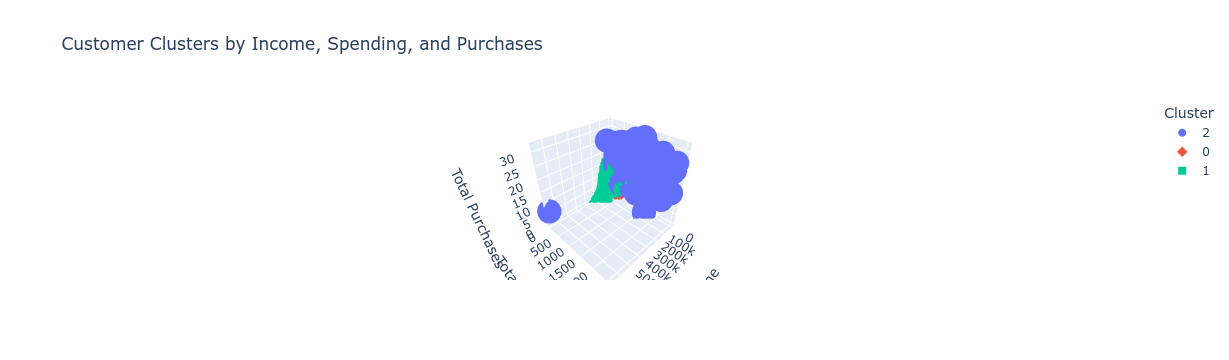

In [10]:
df_viz = df_processed.copy()

df_viz['Cluster'] = cluster_labels
df_viz['Cluster'] = df_viz['Cluster'].astype(str) 
df_viz['Total_Purchases'] = df_viz['NumWebPurchases'] + df_viz['NumCatalogPurchases'] + df_viz['NumStorePurchases']
df_viz['Total_Spent'] = df_viz['MntWines'] + df_viz['MntFruits'] + df_viz['MntMeatProducts'] + df_viz['MntFishProducts'] + df_viz['MntSweetProducts'] + df_viz['MntGoldProds']

fig = px.scatter_3d(
    df_viz, 
    x='Income', 
    y='Total_Spent', 
    z='Total_Purchases',
    color='Cluster',
    symbol='Cluster',
    hover_data=['Customer_Age_Years', 'Education_PhD', 'Education_Graduation'],
    title='Customer Clusters by Income, Spending, and Purchases',
    labels={
        'Income': 'Income', 
        'Total_Spent': 'Total Spent', 
        'Total_Purchases': 'Total Purchases'
    }
)

fig.show()


Based on the vizualization, it's clear the clustering was performed without proper data scaling. 

The clusters are not distinct and the high values in the `Income` and `Total Spent` columns dominate the distance calculations, making the `Total Purchases` column almost irrelevant.

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [11]:
features = ['Income', 'Total_Spent', 'Total_Purchases', 'Customer_Age_Years',
            'Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 
            'Education_Master', 'Education_PhD', 
            'Marital_Status_Absurd', 'Marital_Status_Alone', 'Marital_Status_Divorced', 
            'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 
            'Marital_Status_Widow', 'Marital_Status_YOLO']

In [18]:
df_processed['Total_Purchases'] = df_processed['NumWebPurchases'] + df_processed['NumCatalogPurchases'] + df_processed['NumStorePurchases']
df_processed['Total_Spent'] = df_processed['MntWines'] + df_processed['MntFruits'] + df_processed['MntMeatProducts'] + df_processed['MntFishProducts'] + df_processed['MntSweetProducts'] + df_processed['MntGoldProds']


In [19]:
X = df_processed[features]

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Perform K-Means clustering on the scaled data with 3 clusters
kmeans_scaled = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans_scaled.fit(X_scaled)
cluster_labels_scaled = kmeans_scaled.labels_

# Calculate the new silhouette score
silhouette_scaled = silhouette_score(X_scaled, cluster_labels_scaled)

print(f"The Silhouette Score for 3 clusters with scaled data is: {silhouette_scaled:.4f}")

The Silhouette Score for 3 clusters with scaled data is: 0.1804


**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [23]:
df_processed['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

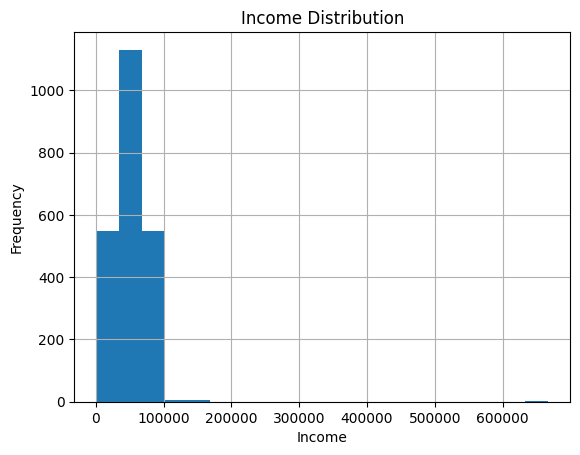

In [34]:
df_processed['Income'].hist(bins=20)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [35]:
df_clean = df_processed[df_processed['Income'] < 100000].copy()

print(f"Number of rows before outlier removal: {len(df_processed)}")
print(f"Number of rows after outlier removal: {len(df_clean)}")

X_clean = df_clean[features]

# Scale the cleaned data
scaler_clean = StandardScaler()
X_clean_scaled = scaler_clean.fit_transform(X_clean)

# Perform K-Means on the cleaned and scaled data with 3 clusters
kmeans_clean = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans_clean.fit(X_clean_scaled)
cluster_labels_clean = kmeans_clean.labels_

# Calculate the silhouette score on the cleaned data
silhouette_clean = silhouette_score(X_clean_scaled, cluster_labels_clean)

print(f"The Silhouette Score for 3 clusters on cleaned data is: {silhouette_clean:.4f}")

Number of rows before outlier removal: 2240
Number of rows after outlier removal: 2227
The Silhouette Score for 3 clusters on cleaned data is: 0.1691


**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

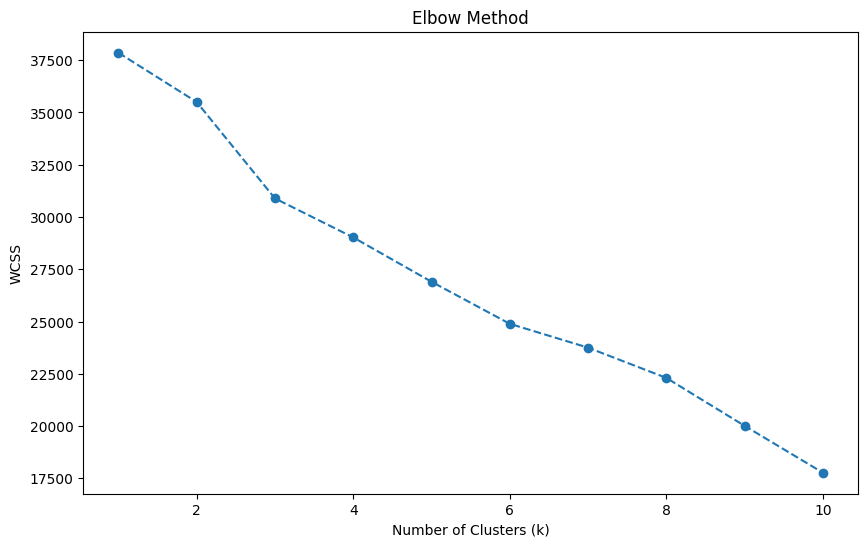

In [36]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X_clean_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [37]:
optimal_k = 4
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans_optimal.fit(X_clean_scaled)
cluster_labels_optimal = kmeans_optimal.labels_

silhouette_optimal = silhouette_score(X_clean_scaled, cluster_labels_optimal)
print(f"The Silhouette Score for {optimal_k} clusters is: {silhouette_optimal:.4f}")

The Silhouette Score for 4 clusters is: 0.1705


**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

In [49]:
X_clean.columns

Index(['Income', 'Total_Spent', 'Total_Purchases', 'Customer_Age_Years',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'],
      dtype='object')

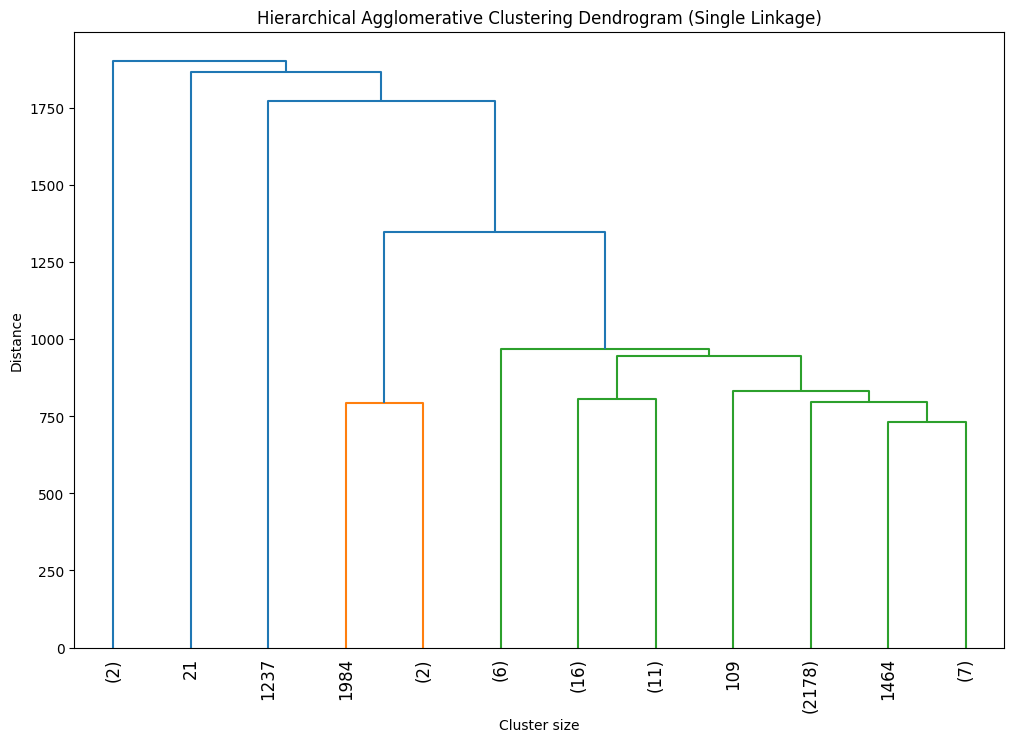

In [50]:
Z = linkage(X_clean, method='single')

plt.figure(figsize=(12, 8))
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=12,  
    show_leaf_counts=True,  
    leaf_rotation=90.,
    leaf_font_size=12.,
)
plt.title('Hierarchical Agglomerative Clustering Dendrogram (Single Linkage)')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

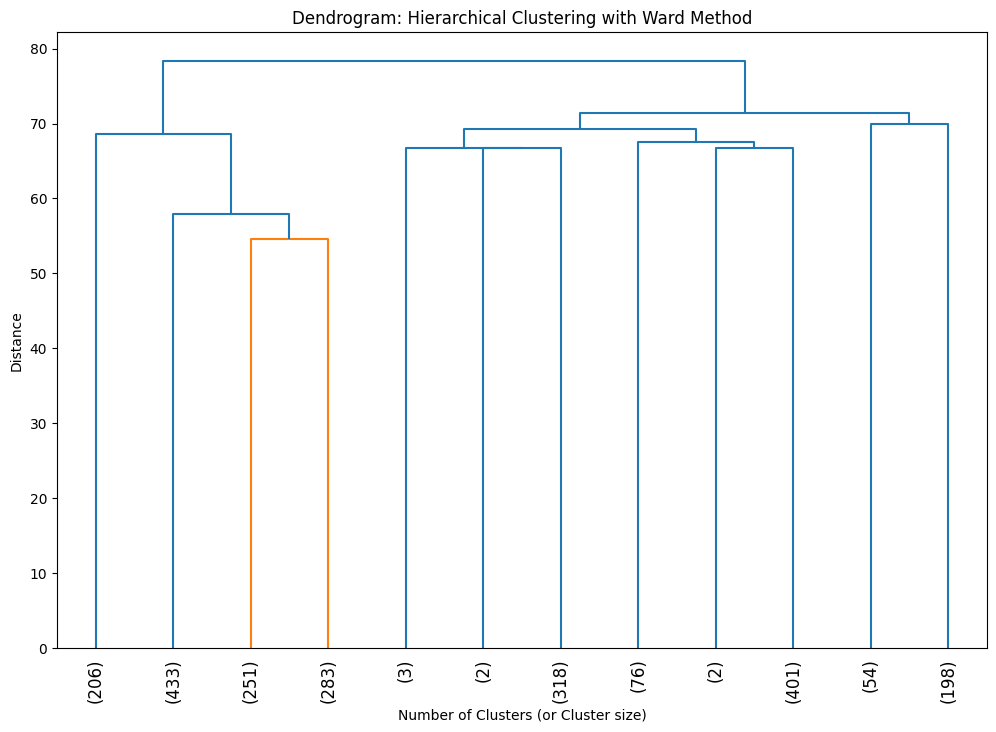

In [51]:
Z_ward = linkage(X_clean_scaled, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(
    Z_ward,
    truncate_mode='lastp',
    p=12,
    show_leaf_counts=True,
    leaf_rotation=90.,
    leaf_font_size=12.,
)
plt.title('Dendrogram: Hierarchical Clustering with Ward Method')
plt.xlabel('Number of Clusters (or Cluster size)')
plt.ylabel('Distance')
plt.show()

The Silhouette Score for 4 clusters (Ward method) is: 0.1888


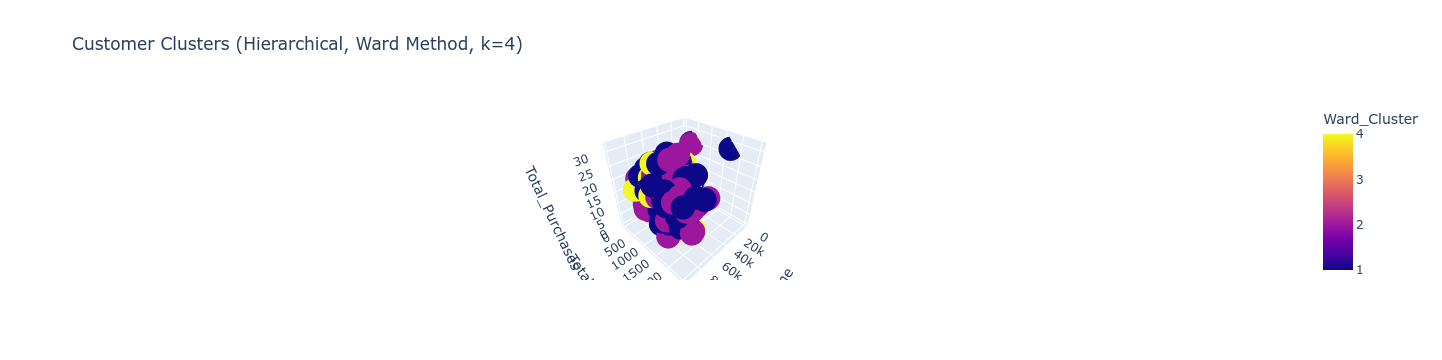

In [52]:
optimal_k = 4
clusters_ward = fcluster(Z_ward, optimal_k, criterion='maxclust')

# Додавання міток кластерів до DataFrame
df_clean['Ward_Cluster'] = clusters_ward

# Розрахунок метрики силуету
silhouette_ward = silhouette_score(X_clean_scaled, clusters_ward)
print(f"The Silhouette Score for {optimal_k} clusters (Ward method) is: {silhouette_ward:.4f}")

# Візуалізація результатів
fig_ward = px.scatter_3d(
    df_clean,
    x='Income',
    y='Total_Spent',
    z='Total_Purchases',
    color='Ward_Cluster',
    title=f'Customer Clusters (Hierarchical, Ward Method, k={optimal_k})'
)
fig_ward.show()